# Project: Investigate a Dataset (No-show appointments)

## Introduction

About the data: I'll be analyzing the (noshowappointments-kagglev2-may-2016.csv) dataset, which gives information about more than 100 thousand patients who made medical appointments in Brazil. The data  is focused on the question of whether or not patients show up for their appointment.

#### The question I'll be answering:
    Q1: Does Age affect the percentage of patients who show for their appointment?
    Q2: Does Gender affect the percentage of patients who show for their appointment?
    Q3: Does Poverty affect the percentage of patients who show for their appointment?
    Q4: Do handicaps and other health problems affect the percentage of patients who show for their appointment?
    Q5: Does the period between scheduling and attending to the appointment matters?

### What I will be doing:
    1- Taking a quick veiw over the data to know its characteristics and problems.
    2- Cleaning the data: determining the unwanted data, fix inconsistent values.
    3- exploring the data to trace the correlations between its variables.
    4- posing and addressing questions.
    5- conclosion.

In [166]:
# importing the probably needed libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

### General Properties

In [167]:
# Loading the data frame and look at a few columns.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


#### So, we have:
    -two ID columns (patientid, AppointmentID), 
    -the (Gender), 
    -datetime (ScheduledDay, AppointmentDay), 
    -the (Age), 
    -(Neighbourhood) the district of the hospital , 
    -(Scholarship) whether or not a patient is enrolled in Brasilian welfare program, 
    -(Hipertension, Diabetes, Alcoholism, Handcap)Four columns for the health problems kind,
    -(SMS_recieved)whether or not the patient recieved an SMS, 
    -and finally, and most importantly, whether a patient shew up(No-show).

In [168]:
# looking at its dimensions.
df.shape

(110527, 14)

In [169]:
# looking at the columns datatypes and messing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [170]:
# getting some summary statistics.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [171]:
# search for duplicated rows.
sum(df.duplicated())

0

In [172]:
#checking the values of Handcap.
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

##### From the above information and statistics we can see that:
    1-There are no missing values or duplicated rows.
    2-We do have problem with the Age values(it includes negative values).
    3-ID columns (PatientId, AppointmentID) are unwanted for the analysis.
    4-(Handcap) and (No-show) labels need correction to be (Handicap) and (Show_up).
        I'll also change the values of the last column(No-show) to be 0 if the patient didn't show for their appointment and 1 otherwise.
    5-Dates columns (ScheduledDay, AppointmentDay) are not in good form.
    6-I will add a new column for the period between the scheduling and the appointment.
    7-I will check for duplicated patients.

### Data Cleaning

Checking for duplicated Patients through (PatientId) column

In [173]:
df.PatientId[df.PatientId.duplicated() ==True].value_counts()

8.221459e+14    87
9.963767e+10    83
2.688613e+13    69
3.353478e+13    64
8.713749e+14    61
                ..
5.139695e+13     1
6.269329e+14     1
6.521977e+14     1
9.299145e+13     1
3.429958e+13     1
Name: PatientId, Length: 24379, dtype: int64

Seems to be a lot of patients who registred for more than one appointment. Since I need to look at the factors that will affect whether a patient will show for their appointment, I will remove the duplicates that exceed 3 times.
I'm doing this because a patient with many appointments may affect the rest of the analysis with his properties. So I'll drop those rows.

In [174]:
id_more_than_3_appo = df.PatientId[df.PatientId.duplicated() ==True].value_counts().gt(3)
id_more_than_3_appo.index[id_more_than_3_appo]
repeated_indexes = df[df.PatientId.isin(id_more_than_3_appo.index[id_more_than_3_appo])].index
repeated_indexes

Int64Index([    21,     27,     37,     47,     52,     60,     71,    151,
               162,    166,
            ...
            110440, 110446, 110452, 110471, 110498, 110503, 110505, 110507,
            110508, 110510],
           dtype='int64', length=18849)

In [175]:
df.drop(labels = repeated_indexes, axis=0, inplace=True)

Making sure the patients with more than 3 appointments were removed.

In [176]:
df.PatientId[df.PatientId.duplicated() ==True].value_counts()

7.359169e+14    3
6.123163e+13    3
3.434837e+13    3
4.917143e+12    3
3.757963e+13    3
               ..
4.615355e+13    1
8.588452e+13    1
2.263866e+07    1
8.391297e+12    1
4.913446e+12    1
Name: PatientId, Length: 21762, dtype: int64

In [177]:
df.shape

(91678, 14)

Around 20k rows were removed.

In [178]:
# Dropping the unwanted columns( PatientId, AppointmentID ) .
df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now let's remove time from the date_time columns (ScheduledDay, AppointmentDay) so that they just include the date and then checking if there any wrong appointment. This will be helpful when adding Period column for the awaiting period before the appointment.

In [179]:
# changing the form of the date columns to exclued time
date_list = ['ScheduledDay', 'AppointmentDay']
for c in date_list:
    df[c] = df[c].apply(lambda x:x[:10])
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [180]:
#checking for appointments that are before scheduling (Wrong appointments)
wrong_appointments = df[pd.to_datetime(df.ScheduledDay) > pd.to_datetime(df.AppointmentDay)]
wrong_appointments.shape

(2, 12)

dropping those 2 rows won't affect any thing

In [181]:
# dropping rows with wrong appointments
df.drop(labels=wrong_appointments.index, axis=0, inplace=True)

getting a column for the Period.

In [182]:
period = (pd.to_datetime(df.AppointmentDay) - pd.to_datetime(df.ScheduledDay)).dt.days
df.insert(3, 'Period', period)
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Period,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No


Now it's time to change the name and format of the last column(No-show) to be(Show_up) with 0,1 instead of Yes,No .

This particularly will be helpful when getting the percentage of the patients who show for their appointment as it will just be the mean of the last column.

In [183]:
df.rename(columns={'No-show':'Show_up'}, inplace=True)
df.Show_up = df.Show_up.map(dict(No=1, Yes=0))
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Period,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1


Now let's check for wrong ages and drop if any exists because there are negative values in the summary statisics above.

In [184]:
#checking wrong_age rows
wrong_ages = df[df.Age <= 0]
wrong_ages.shape

(3332, 13)

that's a lot of rows, and I can't tell if those are baybies or worng entreis. So I will just drop them.

In [185]:
df.drop(labels=wrong_ages.index, axis=0, inplace=True)
df.shape

(88344, 13)

## NOw the data is clean and ready to explore.

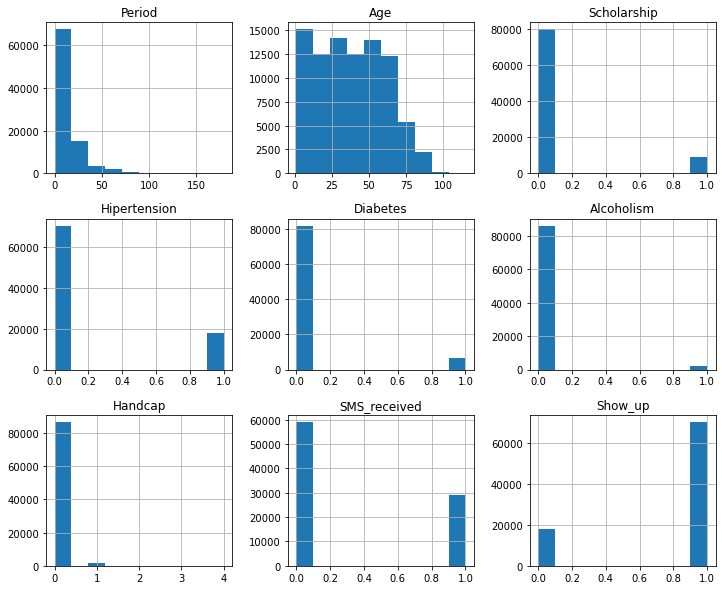

In [186]:
# a quick look on the data distribution.
df.hist(figsize=(12,10));

#### Above we can see:
    -the period very skewed to the right with the majority of patients have appointments on    the day they scheduled.
    -the children are the dominant section of the patients and old patients aren't that much.
    -most patients get no funds from the brazilian government which means the majority aren't poor.
    -most of patients don't suffer Alcoholism, Handcaps. However, Hipertension and Diabetes      represent a significant fraction of health problems.
    -also about 60% of the patients didn't get an SMS message.
    -and of course the majority shew for their appointments.

## Now let's answer the questions

## Q1: Does Age affect the percentage of patients who show for their appointment?

In [187]:
# masks for those who shew for their appointment and and didn't.
do_showup = df.Show_up == True
do_not_showup = df.Show_up == False

df.Age[do_not_showup].mean(), df.Age[do_showup].mean()

(35.08600460337956, 38.63835760162198)

I will look at the age distribution for both cases (do_show, do_not_show)

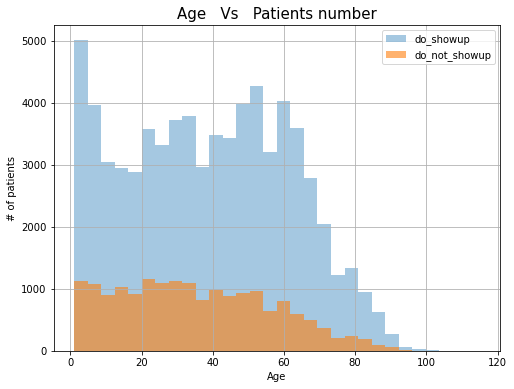

In [188]:
df.Age[do_showup].hist(alpha=.4, label='do_showup', figsize=(8,6), bins=30)
df.Age[do_not_showup].hist(alpha=.6, label='do_not_showup', figsize=(8,6), bins=30)
plt.title('Age   Vs   Patients number', fontsize= 15)
plt.xlabel('Age', fontsize= 10)
plt.ylabel('# of patients', fontsize= 10);
plt.legend();

Here, it's obvious that around 15 years the number of patients who show decreases as the number of those who do not show increases. Hoever, from 40 to 60 the number of patients who show increses more 

We should see it clear if we draw a line chart for the precentage of those who show.

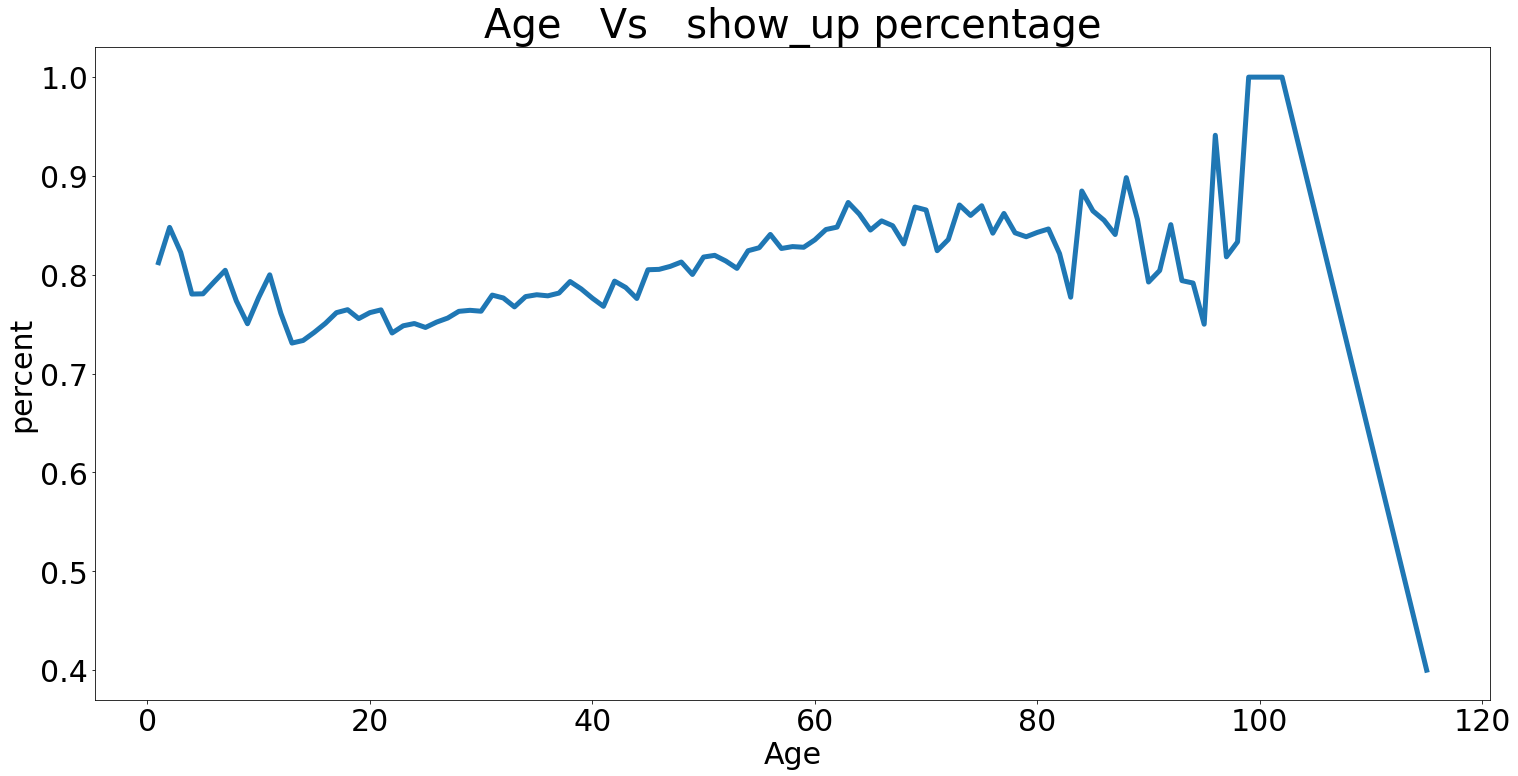

In [189]:
df.groupby('Age').Show_up.mean().plot(kind='line', figsize=(25,12),linewidth = '5', fontsize=30);
plt.title('Age   Vs   show_up percentage', fontsize= 40)
plt.xlabel('Age', fontsize= 30)
plt.ylabel('percent', fontsize= 30);

#### Yes 
Appearingly, the percentage of the patients who shew up for there appointment is larger for babies and children(around 86%) as well as for patients over 60 years(exceeds 90%) which is predictable and normal. The young adult patients around 20 years old, however, have less percentage (around 73%). May be they are just more carless than older patients.
So (Age) does seem to be a fator affecting the percentage of the patients who show for their appointment. 

## Q2: Does Gender affect the percentage of patients who show for their appointment?

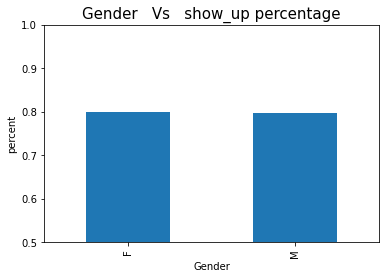

In [190]:
df.groupby('Gender').Show_up.mean().plot(kind='bar').set_ylim([0.5,1]);
plt.title('Gender   Vs   show_up percentage', fontsize= 15)
plt.xlabel('Gender', fontsize= 10)
plt.ylabel('percent', fontsize= 10);

Oh, Grender seems to have no effect on whether patients show or not

Let's check the age effect for each gender

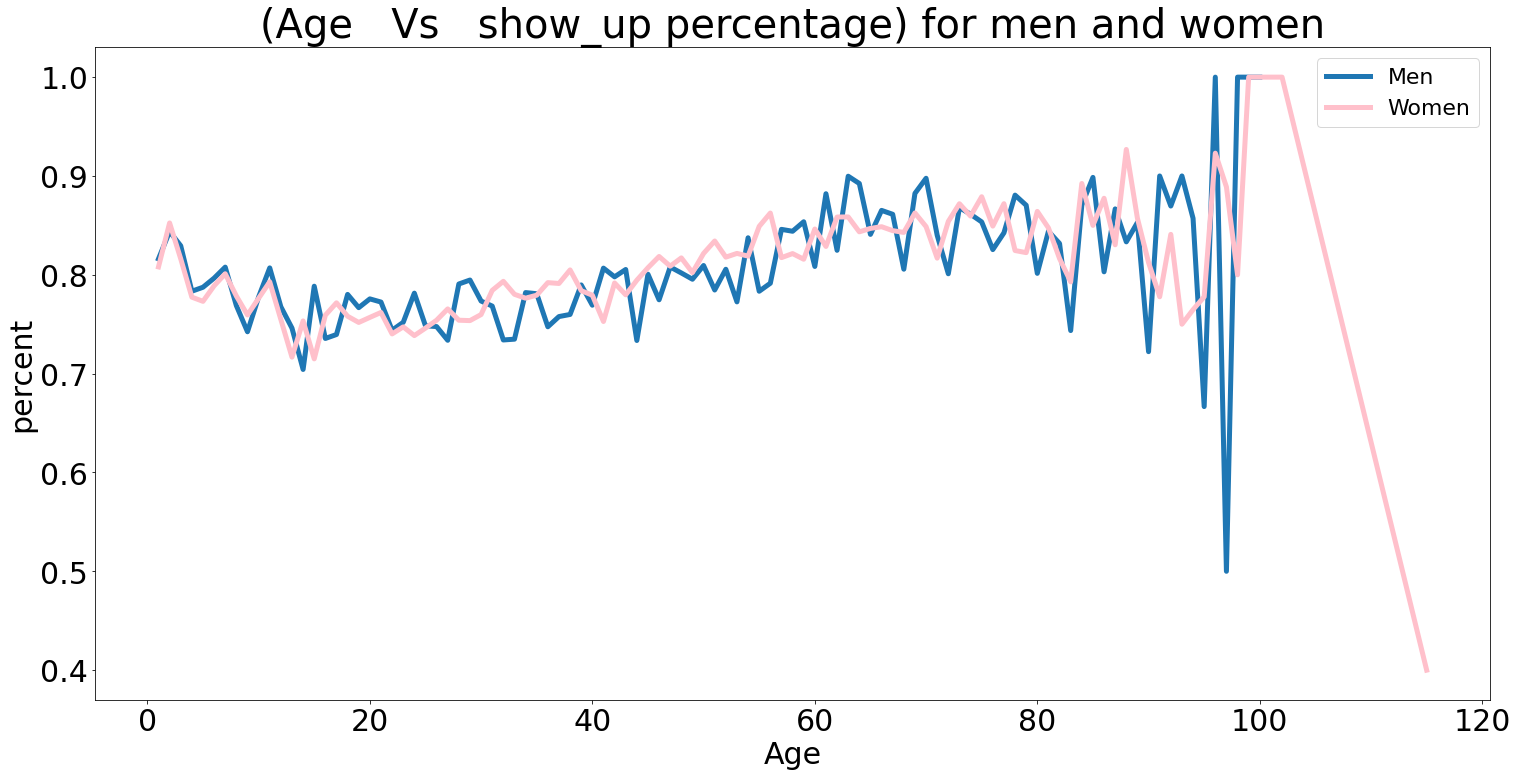

In [191]:
df[df.Gender == 'M'].groupby('Age').Show_up.mean().plot(kind='line', figsize=(25,12),linewidth = '5', fontsize=30);
df[df.Gender == 'F'].groupby('Age').Show_up.mean().plot(kind='line', figsize=(25,12),linewidth = '5', fontsize=30, color='pink');
plt.title('(Age   Vs   show_up percentage) for men and women', fontsize= 40)
plt.xlabel('Age', fontsize= 30)
plt.ylabel('percent', fontsize= 30)
plt.legend(['Men','Women'],fontsize=22);

Not that much difference except, may be, for the region between 30 and 60 where females seem, generaly, to be more committed to show.

## Q3: Does Poverty affect the percentage of patients who show for their appointment?

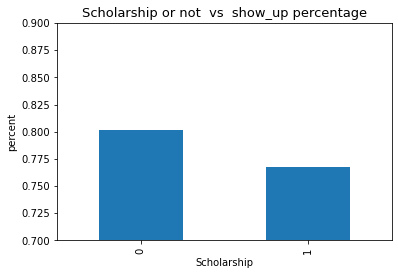

In [192]:
df.groupby('Scholarship').Show_up.mean().plot(kind='bar').set_ylim([0.7,0.9]);
plt.title('Scholarship or not  vs  show_up percentage', fontsize= 13)
plt.ylabel('percent', fontsize= 10);

In [193]:
df.groupby('Scholarship').Show_up.mean()

Scholarship
0    0.801738
1    0.767618
Name: Show_up, dtype: float64

On average, the patients who get funds or scholarships seem to have a less percentage of showing for their appointment than do those who  don't get a scholarship. The difference is around 3% .

## Q4: Do handicaps and other health problems affect the percentage of patients who show for their appointment?

First, I will look at the counts of Handcap values.

In [194]:
df.Handcap.value_counts()

0    86698
1     1486
2      144
3       13
4        3
Name: Handcap, dtype: int64

Since the counts of Handcap is small low for 3 and 4, I will only consider Handcaps of values 0, 1, 2 

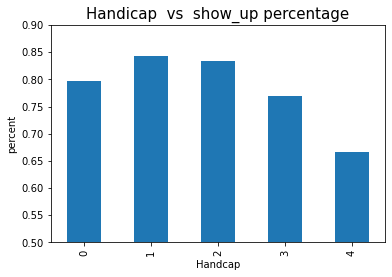

In [195]:
df.groupby('Handcap').Show_up.mean().plot(kind='bar').set_ylim([0.5,0.9]);
plt.title('Handicap  vs  show_up percentage', fontsize= 15)
plt.ylabel('percent', fontsize= 10);

### Yes
Patients with handicaps seem, in genral, to have greater probability to show for their appointments. About 5% greater.

### Ok, let's check the percentiles for Hipertension.

First, I will look at the counts of patients suffering Hipertension.

In [196]:
df.Hipertension.value_counts()

0    70433
1    17911
Name: Hipertension, dtype: int64

patients suffering Hipertension represents a significant amount of the total patients. I will plot it against the percentiles.

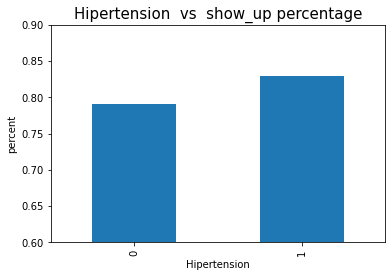

In [197]:
df.groupby('Hipertension').Show_up.mean().plot(kind='bar').set_ylim([0.6,0.9]);
plt.title('Hipertension  vs  show_up percentage', fontsize= 15)
plt.ylabel('percent', fontsize= 10);

In [198]:
df.groupby('Hipertension').Show_up.mean()

Hipertension
0    0.790425
1    0.829602
Name: Show_up, dtype: float64

### Yes
About 4% difference between patients with hipertension and those without. So yes we can tell that Hipertension patients are more probable to show for their scheduled appointments.

### Ok, let's check the percentiles for Alcoholism.

getting the pecentiles and plotting them.

In [199]:
df.groupby('Alcoholism').Show_up.mean()

Alcoholism
0    0.799334
1    0.760919
Name: Show_up, dtype: float64

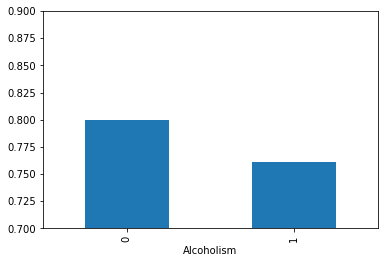

In [200]:
df.groupby('Alcoholism').Show_up.mean().plot(kind='bar').set_ylim([0.7,0.9]);

### Yes
Appearingly, the patients who aren't alcohol adicts show more commitment to show for their appointments. About 4% greater.

## Q5: Does the period between scheduling and attending to the appointment matters?

Let's see the distribution of patients over the awaiting period

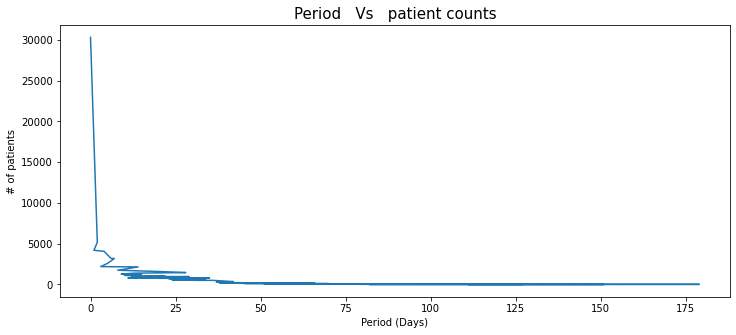

In [202]:
df.Period.value_counts().plot(figsize=(12,5));
plt.title('Period   Vs   patient counts', fontsize= 15)
plt.xlabel('Period (Days)', fontsize= 10)
plt.ylabel('# of patients', fontsize= 10);

Well, the dominant majority of patients scheduled appointments on the same day, however there is kind of good distribution over the 25 day period. 
So, let's plot the period against the corresponding percentiles.

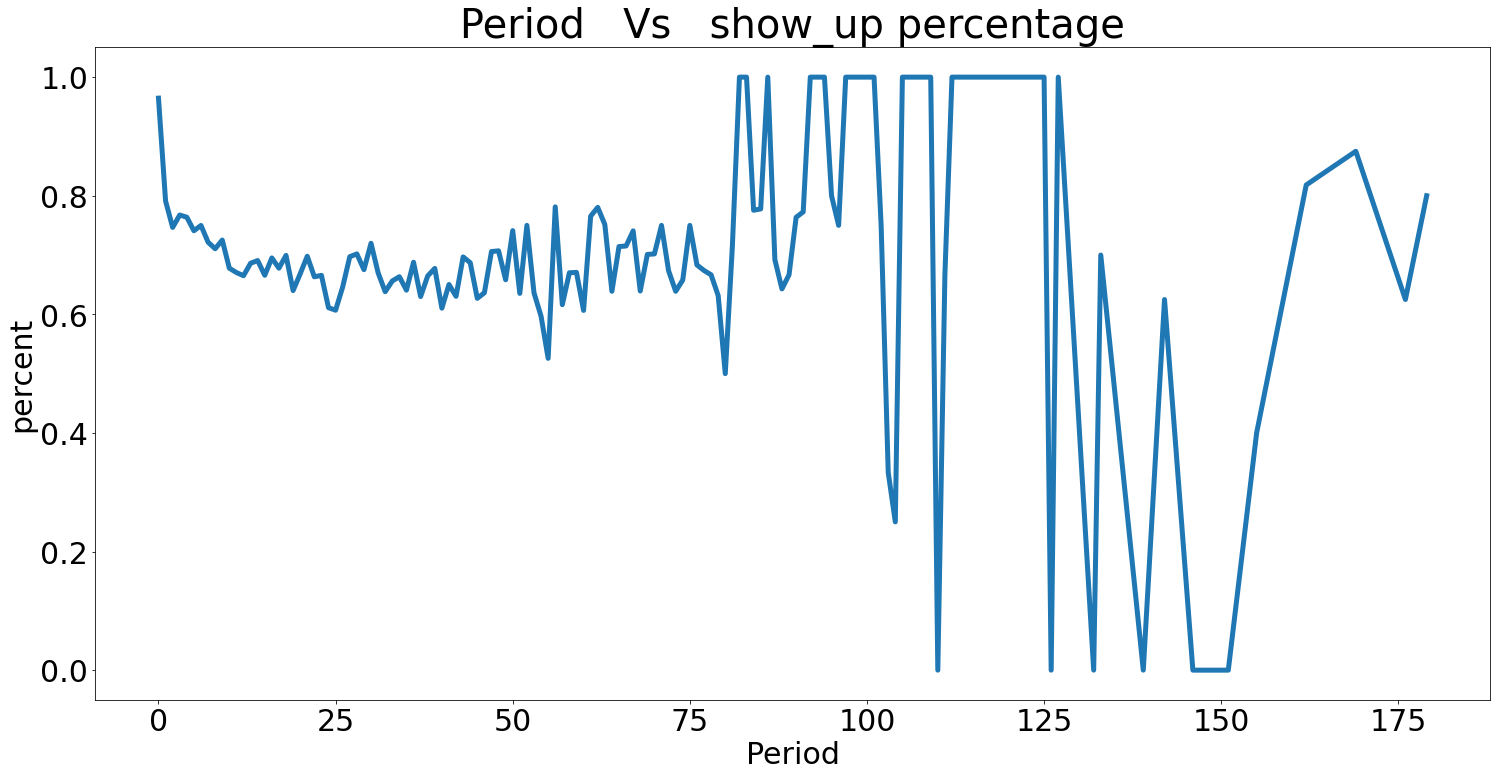

In [204]:
df.groupby('Period').Show_up.mean().plot(kind='line', figsize=(25,12),linewidth = '5', fontsize=30);
plt.title('Period   Vs   show_up percentage', fontsize= 40)
plt.xlabel('Period', fontsize= 30)
plt.ylabel('percent', fontsize= 30);

### OF COURSE 
the relation between the period and the corresponding percentage of patients who show for there appointments is strong for the 25 day period where most of registrations exisit.
The correlation is strong and negative over this region. Howevre, it seems to be weak and positive over the region (25 to 80).

# conclusion:

### Findings:
    

1- There is a negative correlation between age and the the percentage of the patients who shew up for there appointment over (age<15) and then the correlation is weak and positive over (age>15).

2- For the majority of patients, there is a strong negative correlation between the period and the probability that the patients will show for there appointments.

3- The patients who aren't alcohol adicts show more commitment to show for their appointments. About 4% greater.

4- Hipertension patients are more probable to show for their scheduled appointments.

5- Patients with handicaps seem, in genral, to have greater probability to show for their appointments.

### Limitations:

1- There are many patients who scheduled more than one appointment (over 80 appointmets for some patients) which can affect the prediction of the analysis because they are just repeated properties in most cases.

2- The values of Handcap was confusing in encoding. Some resources consider them as the number of disabilities while other google resources deals with those values as categories (1-visual , 2-hearing , 3-motor , 4-mental).

3- There were negative and zero ages which were hard to replace as it could affect the findings.

4- Factors like gender and other health problems have weak effects to predict upon.